<a href="https://colab.research.google.com/github/Atchu167/Main-Project/blob/main/HR_Analytics_Attrition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_excel('hr_analytics_attrition_dataset.xlsx')

In [2]:
df=pd.get_dummies(df,columns=['department','salary'],drop_first=True)

In [3]:
!pip install shap

In [4]:
from sklearn.model_selection import train_test_split
x=df.drop('left',axis=1)
y=df['left']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Coefficients: [[-2.97841357e+00 -3.02051879e+00 -4.62999635e-02  3.01749930e-03
   8.23147054e-01 -2.20263119e-01 -4.01940175e+00 -1.15831960e-01
   1.05084721e-01 -2.62234097e-01  1.60698746e-01  9.84215363e-02
  -1.37903224e-01  1.07538036e-01]]
Intercept: [-0.54601903]


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[76 15]
 [10 99]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        91
           1       0.87      0.91      0.89       109

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



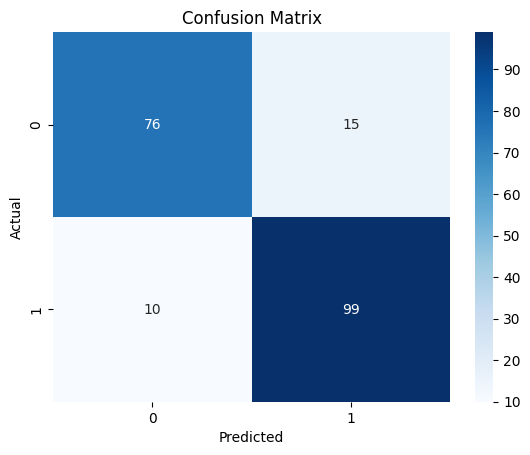

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [10]:
!pip install shap

In [11]:
import shap

In [12]:
explainer = shap.Explainer(model, x_train)
shap_values = explainer(x_test)

In [13]:
!pip install matplotlib-venn

In [14]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


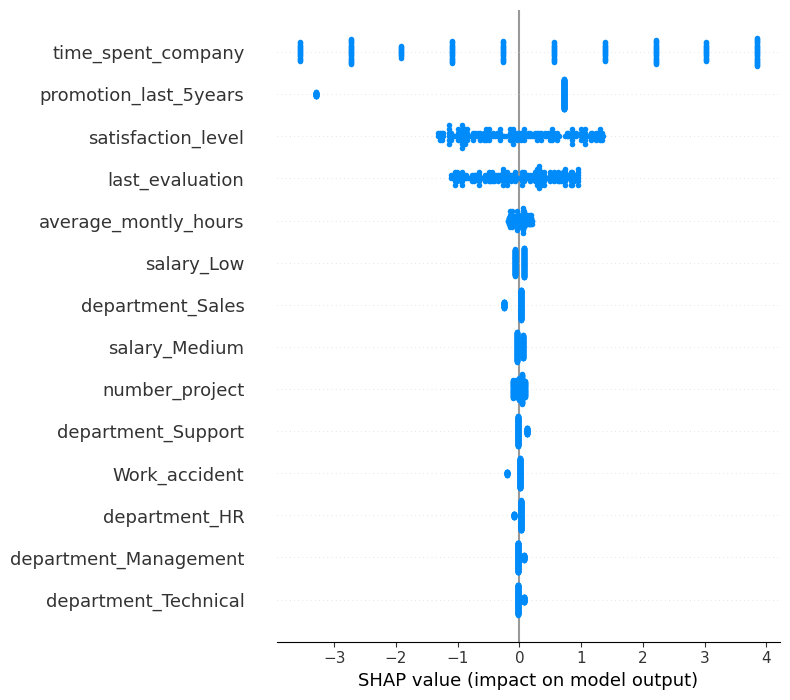

In [15]:
import numpy as np
shap.summary_plot(np.array(shap_values.values, dtype=np.float64), x_test.columns)

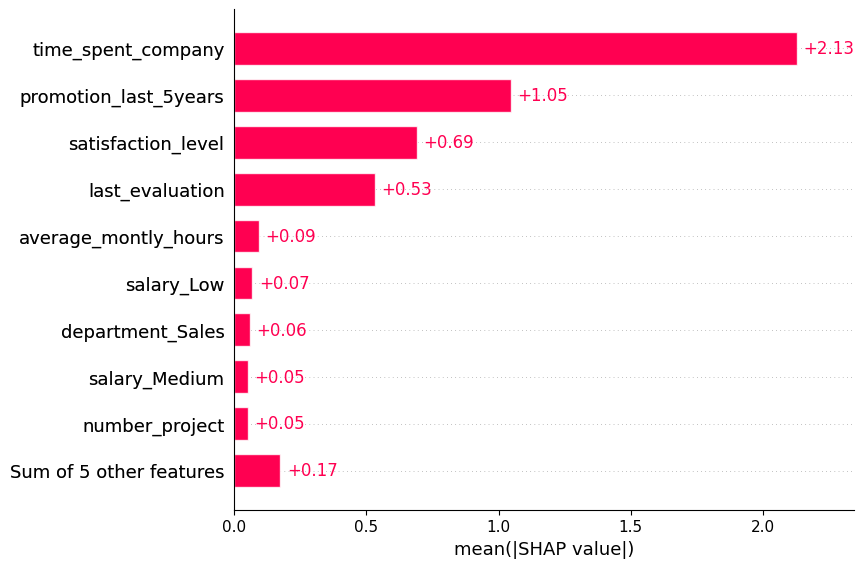

In [16]:
shap.plots.bar(shap_values)

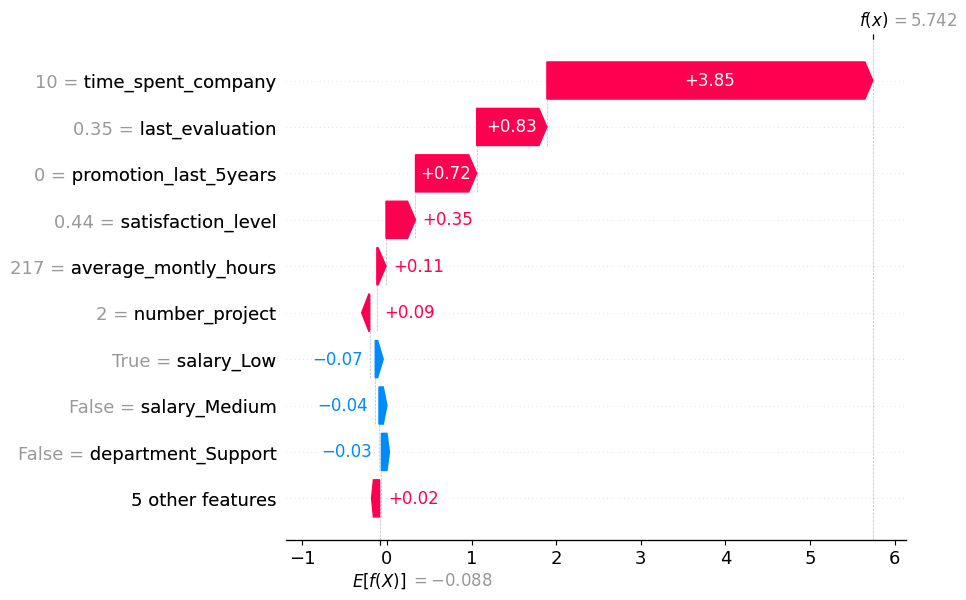

In [17]:
shap.plots.waterfall(shap_values[0])

In [18]:
# Train Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

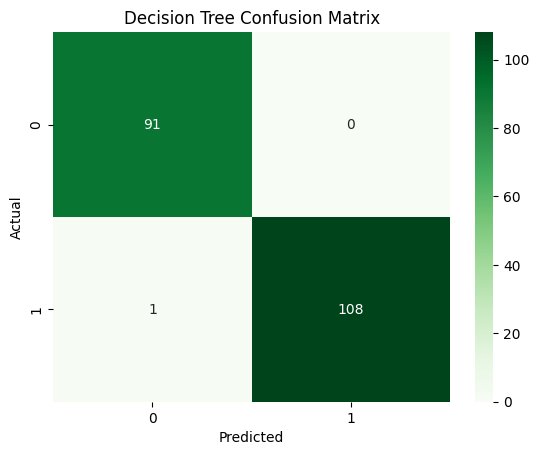

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1       1.00      0.99      1.00       109

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [20]:
dt_cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred_dt))